In [1]:
from pathlib import Path
from ast import literal_eval
from collections import Counter
import pickle

import pandas as pd
import numpy as np

# Build merge of best results

In [2]:
# last taken adn_circulant_brute_force_14.log
file_name = 'adn_circulant_brute_force_2.log'
data = pd.read_csv(Path('..') / 'results' / 'zscore' / file_name, sep='|', header=0, names=['mean', 'std', 'scores_cv', 'features'])

In [3]:
data.sort_values('mean', inplace=True, ascending=False)
data.reset_index(drop=True, inplace=True)

In [4]:
nb_best_results = 50000
best_results_tmp = data.loc[: nb_best_results, :]

In [2]:
best_results_file_name = 'best_results.log'
best_results = pd.read_csv(Path('..') / 'results' / 'zscore' / best_results_file_name, sep='|', header=0, names=['mean', 'std', 'scores_cv', 'features'])

In [6]:
best_results.shape

(50001, 4)

In [7]:
best_results = pd.concat([best_results, best_results_tmp])
best_results.sort_values('mean', inplace=True, ascending=False)
best_results.reset_index(drop=True, inplace=True)

In [8]:
best_results.shape

(100002, 4)

In [9]:
best_results.to_csv(Path('..') / 'results' / 'zscore' / best_results_file_name, sep='|', index=False)

# Load data

In [2]:
file_name = 'adn_circulant_brute_force_1.log'
data = pd.read_csv(Path('..') / 'results' / best_results_file_name, sep='|', header=0, names=['mean', 'std', 'scores_cv', 'features'])

NameError: name 'best_results_file_name' is not defined

In [4]:
data.sort_values('mean', inplace=True, ascending=False)
data.reset_index(drop=True, inplace=True)

In [87]:
data.head(100)

,mean,std,scores_cv,features
0,72.8,3.9,[0.76666667 0.73333333 0.75862069 0.72413793 0...,"['5:115000001-116000000_ratio', '9:3000001-400..."
1,72.8,5.4,[0.76666667 0.63333333 0.72413793 0.79310345 0...,"['2:96000001-97000000_ratio', '5:56000001-5700..."
2,72.8,5.5,[0.73333333 0.76666667 0.62068966 0.75862069 0...,"['20:25000001-26000000_ratio', '11:114000001-1..."
3,72.8,2.2,[0.73333333 0.73333333 0.72413793 0.75862069 0...,"['1:240000001-241000000_ratio', '1:238000001-2..."
4,72.8,2.2,[0.73333333 0.73333333 0.68965517 0.72413793 0...,"['5:71000001-72000000_ratio', '12:125000001-12..."
...,...,...,...,...
95,71.4,6.2,[0.76666667 0.63333333 0.65517241 0.79310345 0...,"['16:20000001-21000000_ratio', '9:3000001-4000..."
96,71.4,3.5,[0.73333333 0.7 0.65517241 0.75862069 0...,"['2:176000001-177000000_ratio', '18:60000001-6..."
97,71.4,4.8,[0.73333333 0.73333333 0.62068966 0.75862069 0...,"['5:102000001-103000000_ratio', '4:23000001-24..."
98,71.4,5.4,[0.8 0.73333333 0.65517241 0.72413793 0...,"['8:51000001-52000000_ratio', '2:64000001-6500..."


# Find commun features

In [217]:
data = best_results

In [218]:
n_cv = 750
features_list = [literal_eval(x) for x in data.loc[:n_cv,  'features'].to_list()]
features_flat_list = [item for sublist in features_list for item in sublist]


In [219]:
c = Counter(features_flat_list)

In [220]:
nb_features = 130
features_name = [x[0] for x in c.most_common()[:nb_features]]

In [221]:
features_name = [x.replace('zscore', 'ratio') for x in features_name]

In [222]:
chromosomes_nb = [x.split(':')[0] for x in features_name]
c_chrom = Counter(chromosomes_nb)
pd.DataFrame(c_chrom.most_common(), columns=['chrom_number', 'count'])

,chrom_number,count
0,5,15
1,2,13
2,11,10
3,9,9
4,3,9
5,1,8
6,12,7
7,7,7
8,6,6
9,14,6


# Train model

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [224]:
X = pickle.load(open(Path('..') / 'features' / 'score2' / 'X.pkl', 'rb'))
y = pickle.load(open(Path('..') / 'features' / 'score2' / 'y.pkl', 'rb'))

In [225]:
X.head()

,1:1000001-2000000_ratio,1:3000001-4000000_ratio,1:4000001-5000000_ratio,1:5000001-6000000_ratio,1:6000001-7000000_ratio,1:7000001-8000000_ratio,1:8000001-9000000_ratio,1:9000001-10000000_ratio,1:10000001-11000000_ratio,1:11000001-12000000_ratio,...,22:44000001-45000000_ratio,22:45000001-46000000_ratio,22:46000001-47000000_ratio,22:47000001-48000000_ratio,22:48000001-49000000_ratio,22:49000001-50000000_ratio,22:50000001-51000000_ratio,18:45000001-46000000_ratio,2:225000001-226000000_ratio,8:76000001-77000000_ratio
0,-0.041425,-0.062404,-0.003995,-0.067551,-0.057628,-0.053104,-0.062307,-0.031371,-0.025168,-0.018076,...,0.041221,0.012138,0.042645,0.077557,0.033111,-0.077562,-0.015159,0.000000,0.000000,0.000000
1,0.096445,0.167901,0.165071,0.143986,0.114711,0.113785,0.068796,0.129963,0.095869,0.135168,...,-0.006285,-0.034423,-0.059856,-0.052685,0.001125,-0.050018,-0.023070,0.011139,0.000000,0.000000
2,0.059786,0.117976,0.133299,0.190704,0.105671,0.113527,0.029876,0.079141,0.059944,0.094458,...,-0.047896,-0.066174,-0.056281,-0.014406,-0.010367,-0.025716,-0.070117,0.130662,0.000000,0.000000
3,-0.114674,-0.100271,-0.092227,-0.039484,-0.027193,-0.089304,-0.030149,-0.043021,-0.056526,-0.046655,...,-0.029622,-0.048595,-0.018079,0.008208,-0.027896,-0.023271,0.007759,0.060658,-0.154327,0.000000
4,-0.080659,-0.087107,0.091030,0.071785,0.006113,0.018225,0.045128,-0.029757,-0.037894,0.031310,...,-0.068271,0.032243,0.000874,-0.023101,-0.019642,-0.016183,-0.022795,-0.029819,0.000000,-0.032918


In [226]:
X_light = X.loc[:, features_name]

In [227]:
print(len([x for x in y if x ==1]))
print(len([x for x in y if x ==0]))

75
94


## manual cross val

In [228]:
from typing import Tuple

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [229]:
def compute_one_CV_scores(X_light: pd.DataFrame, y:list, idx_train: list, idx_test: list) -> Tuple[int, list, int, list]:
    lr = LogisticRegression(C=1, class_weight='balanced')
    
    ss = StandardScaler().fit(X_light.loc[idx_train, :])
    X_train = ss.transform(X_light.loc[idx_train, :])
    #X_train = X_light.loc[idx_train, :]
    y_train = np.array(y)[idx_train] 
    lr.fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)

    train_acc = accuracy_score(y_train_pred, y_train)
    train_scores = precision_recall_fscore_support(y_train_pred, y_train, labels=[0, 1])
    
    X_test = ss.transform(X_light.loc[idx_test, :])
    #X_test = X_light.loc[idx_test, :]
    y_test = np.array(y)[idx_test]
    
    y_test_pred = lr.predict(X_test)
    test_acc = accuracy_score(y_test_pred, y_test)
    test_scores = precision_recall_fscore_support(y_test_pred, y_test, labels=[0, 1])
        
    return train_acc, train_scores, test_acc, test_scores, lr


In [246]:
nb_cv = 4
skf = StratifiedKFold(n_splits=nb_cv)
accuracy = []
models = []
train_score, test_score = [], []
models = []

for i, (idx_train, idx_test) in enumerate(skf.split(X_light, y)):
    train_acc, train_scores, test_acc, test_scores, lr = compute_one_CV_scores(X_light, y, idx_train, idx_test)
    
    models.append(lr)
    train_score.append(train_scores)
    test_score.append(test_scores)    
    accuracy.append((train_acc, test_acc))


### scores

In [247]:
print("Accuracy :")
round(100 * pd.DataFrame(accuracy, columns=['train', 'test']).mean(axis=0), 1)

Accuracy :


train    100.0
test      98.8
dtype: float64

In [248]:
accuracy

[(1.0, 1.0), (1.0, 1.0), (1.0, 0.9761904761904762), (1.0, 0.9761904761904762)]

In [249]:
mean_train_score = np.round(100 * np.sum(train_score, axis=0) / nb_cv, 1)
pd.DataFrame(mean_train_score, columns=[0, 1], index= ['precision', 'rappel', 'f1score', 'support'])

,0,1
precision,100.0,100.0
rappel,100.0,100.0
f1score,100.0,100.0
support,7050.0,5625.0


In [250]:
mean_test_score = np.round(100 * np.sum(test_score, axis=0) / nb_cv, 1)
pd.DataFrame(mean_test_score, columns=[0, 1], index= ['precision', 'rappel', 'f1score', 'support'])

,0,1
precision,98.9,98.6
rappel,99.0,98.8
f1score,98.9,98.6
support,2350.0,1875.0


### coeff

In [116]:
mean_coef = np.zeros(len(features_name))
for i in range(0, nb_cv):
    mean_coef += models[i].coef_[0]
mean_coef = mean_coef / nb_cv

In [117]:
coef_lr = pd.DataFrame({'feature': X_light.columns,'weight': mean_coef})
coef_lr.sort_values('weight', ascending=False)

,feature,weight
33,4:9000001-10000000_ratio,0.356953
30,18:43000001-44000000_ratio,0.299051
223,15:45000001-46000000_ratio,0.294346
227,18:27000001-28000000_ratio,0.288043
39,5:145000001-146000000_ratio,0.286852
...,...,...
0,6:1-1000000_ratio,-0.295943
34,9:3000001-4000000_ratio,-0.297271
103,19:50000001-51000000_ratio,-0.305042
128,12:81000001-82000000_ratio,-0.308259


array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

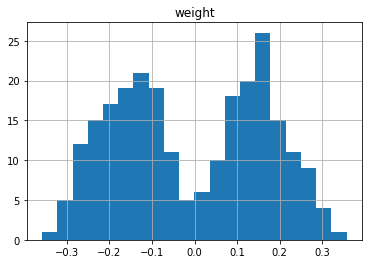

In [123]:
coef_lr.hist(bins=20)

In [126]:
threshold_features = 0.15
new_features_set = coef_lr.loc[abs(coef_lr['weight']) > threshold_features, 'feature']

In [127]:
len(new_features_set)

128

# Find best number of features

In [182]:
nb_features = range(10, 300)
res = {}

for nb_feat in nb_features:
    features_name = [x[0] for x in c.most_common()[:nb_feat]]
    features_name = [x.replace('zscore', 'ratio') for x in features_name]

    X_light = X.loc[:, features_name]
    scores_cv = []
    for i, (idx_train, idx_test) in enumerate(skf.split(X_light, y)):
        train_acc, train_scores, test_acc, test_scores, lr = compute_one_CV_scores(X_light, y, idx_train, idx_test)
        scores_cv.append(test_acc)
    
    res[nb_feat] = np.mean(scores_cv)


In [183]:
res_df = pd.DataFrame({'nb_feat': list(res.keys()), 'score': list(res.values())})

In [184]:
res_df.sort_values('score', ascending=False)[:50]

,nb_feat,score
127,137,0.988095
128,138,0.988095
126,136,0.988095
125,135,0.988095
124,134,0.988095
122,132,0.988095
120,130,0.988095
129,139,0.988095
130,140,0.988095
131,141,0.988095


In [146]:
# For files from 1 to 13, with score

# Best results : 140 features, n_cv=5000
# Best results : 67 features, n_cv=500, score=0.843908
# Best results : 266 features, n_cv=1000, score=0.851034
# Best results : 92 features, n_cv=750, score=0.864368

In [ ]:
# Good result 83 features, en faisant les z-score depuis les ratio depuis les columnes issues des lr sur z-scores
# Good result with 90 features et n_cv=500, 98.2
# Good result with 130 features, et n_cv=750, 98.8

## Test pycaret

In [73]:
X_light['label'] = y

In [75]:
from pycaret.classification import *
exp_clf101 = setup(data = X_light, target = 'label', session_id=123) 

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(169, 242)"
5,Missing Values,0
6,Numeric Features,241
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [76]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9242,0.0000,0.9033,0.9290,0.9119,0.8451,0.8514,0.0030
ridge,Ridge Classifier,0.9167,0.0000,0.8333,0.9800,0.8928,0.8274,0.8428,0.0030
lr,Logistic Regression,0.8417,0.9660,0.6800,0.9657,0.7600,0.6614,0.7063,0.2570
lda,Linear Discriminant Analysis,0.7803,0.8468,0.7367,0.7698,0.7415,0.5519,0.5647,0.0060
et,Extra Trees Classifier,0.7053,0.8119,0.5833,0.7036,0.6201,0.3896,0.4039,0.0360
rf,Random Forest Classifier,0.6803,0.7781,0.5300,0.7190,0.5631,0.3385,0.3717,0.0430
knn,K Neighbors Classifier,0.6773,0.7508,0.3400,0.8250,0.4452,0.3009,0.3751,0.1500
nb,Naive Bayes,0.6644,0.7213,0.5433,0.6167,0.5654,0.3006,0.3031,0.0040
gbc,Gradient Boosting Classifier,0.6606,0.7360,0.5733,0.6977,0.5876,0.3139,0.3523,0.0790
qda,Quadratic Discriminant Analysis,0.6008,0.6005,0.5867,0.5270,0.5361,0.1979,0.2082,0.0050
